<a href="https://colab.research.google.com/github/amanzoni1/prove_varie/blob/main/provetec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycocotools

In [2]:
# Create a directory to store the COCO dataset
import os

coco_data_dir = '/content/coco_data'
os.makedirs(coco_data_dir, exist_ok=True)

In [3]:
import urllib.request

# URLs for COCO 2017 validation images and annotations
val_images_url = 'http://images.cocodataset.org/zips/val2017.zip'
annotations_url = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'

# File paths
val_images_path = os.path.join(coco_data_dir, 'val2017.zip')
annotations_path = os.path.join(coco_data_dir, 'annotations_trainval2017.zip')

# Download validation images
urllib.request.urlretrieve(val_images_url, val_images_path)
print(f"Downloaded validation images to {val_images_path}")

# Download annotations
urllib.request.urlretrieve(annotations_url, annotations_path)
print(f"Downloaded annotations to {annotations_path}")

Downloaded validation images to /content/coco_data/val2017.zip
Downloaded annotations to /content/coco_data/annotations_trainval2017.zip


In [4]:
import zipfile

# Extract validation images
with zipfile.ZipFile(val_images_path, 'r') as zip_ref:
    zip_ref.extractall(coco_data_dir)
print("Extracted validation images")

# Extract annotations
with zipfile.ZipFile(annotations_path, 'r') as zip_ref:
    zip_ref.extractall(coco_data_dir)
print("Extracted annotations")

Extracted validation images
Extracted annotations


In [5]:
# Verify directory structure
import os

def list_files(directory, max_files=10):
    files = os.listdir(directory)
    print(f"Files in {directory}:")
    for file in files[:max_files]:
        print(f" - {file}")

# List files in the coco_data directory
list_files(coco_data_dir)

Files in /content/coco_data:
 - val2017.zip
 - annotations_trainval2017.zip
 - val2017
 - annotations


In [21]:
def overlay_masks(image, annotations):
    """Overlay COCO segmentation masks on the image."""
    for ann in annotations:
        if 'segmentation' in ann:
            # Check if the segmentation is a list (RLE) or a polygon
            if isinstance(ann['segmentation'], list):
                # Handle RLE (Run-Length Encoding) format
                mask_array = mask.decode(ann['segmentation'])
            else:
                # Handle polygon format
                mask_array = mask.decode({
                    'counts': ann['segmentation'],
                    'size': [image.shape[0], image.shape[1]]
                })

            mask_array = mask_array[:, :, 0]  # Keep only the first channel

            # Overlay the mask on the image
            color = np.random.randint(0, 255, size=3).tolist()
            image[mask_array > 0] = (image[mask_array > 0] * 0.5 + np.array(color) * 0.5).astype(np.uint8)

    return image

In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pycocotools.coco import COCO
from pycocotools import mask

# Initialize COCO API
coco_annotations_path = '/content/coco_data/annotations/instances_val2017.json'
coco = COCO(coco_annotations_path)

# Example image info (update with actual image ID from your dataset)
some_image_id = 397133  # Replace with actual image ID
image_info = coco.loadImgs([some_image_id])[0]

# Load the image file
img = cv2.imread(f'/content/coco_data/val2017/{image_info["file_name"]}')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for matplotlib

# Define the category ID for 'person'
person_category_id = coco.getCatIds(catNms=['person'])[0]

# Get all annotation IDs for the image
ann_ids = coco.getAnnIds(imgIds=image_info['id'], catIds=[person_category_id], iscrowd=None)
annotations = coco.loadAnns(ann_ids)

def overlay_masks(image, annotations):
    """Overlay COCO segmentation masks on the image."""
    for ann in annotations:
        if 'segmentation' in ann:
            # Check if the segmentation is a list (RLE) or a polygon
            if isinstance(ann['segmentation'], list):
                # Handle RLE (Run-Length Encoding) format
                mask_array = mask.decode(ann['segmentation'])
            else:
                # Handle polygon format
                mask_array = mask.decode({
                    'counts': ann['segmentation'],
                    'size': [image.shape[0], image.shape[1]]
                })

            mask_array = mask_array[:, :, 0]  # Keep only the first channel

            # Overlay the mask on the image
            color = np.random.randint(0, 255, size=3).tolist()
            image[mask_array > 0] = (image[mask_array > 0] * 0.5 + np.array(color) * 0.5).astype(np.uint8)

    return image

# Apply the mask overlay
img_with_masks = overlay_masks(img, annotations)

# Display the image with masks
plt.imshow(img_with_masks)
plt.axis('off')  # Hide axes
plt.show()

loading annotations into memory...
Done (t=0.99s)
creating index...
index created!


TypeError: list indices must be integers or slices, not str

In [16]:
# Initialize COCO API
coco_annotations_path = '/content/coco_data/annotations/instances_val2017.json'
coco = COCO(coco_annotations_path)

# Get all image IDs
image_ids = coco.getImgIds()

# Load information for a specific image ID
image_info = coco.loadImgs([image_ids[0]])[0]  # Load the first image as an example

# Print the image information
print(f"Image ID: {image_info['id']}")
print(f"File Name: {image_info['file_name']}")
print(f"Width: {image_info['width']}")
print(f"Height: {image_info['height']}")

loading annotations into memory...
Done (t=1.37s)
creating index...
index created!
Image ID: 397133
File Name: 000000397133.jpg
Width: 640
Height: 427


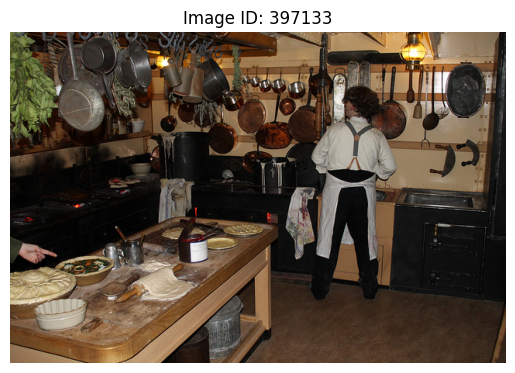

In [18]:
import matplotlib.pyplot as plt
import cv2

# Load a sample image
image_info = coco.loadImgs([image_ids[0]])[0]
img = cv2.imread(f'/content/coco_data/val2017/{image_info["file_name"]}')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title(f"Image ID: {image_info['id']}")
plt.show()

loading annotations into memory...
Done (t=1.01s)
creating index...
index created!


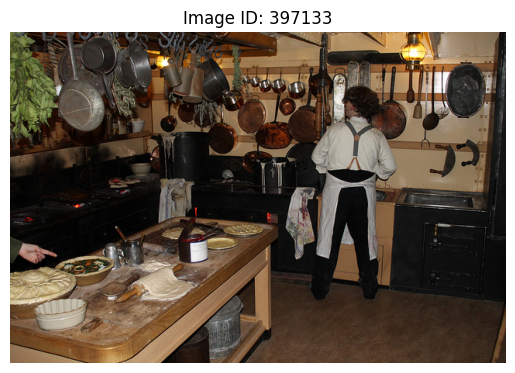

Annotation ID: 82445
Category ID: 44
Bounding Box: [217.62, 240.54, 38.99, 57.75]
Segmentation: [[224.24, 297.18, 228.29, 297.18, 234.91, 298.29, 243.0, 297.55, 249.25, 296.45, 252.19, 294.98, 256.61, 292.4, 254.4, 264.08, 251.83, 262.61, 241.53, 260.04, 235.27, 259.67, 230.49, 259.67, 233.44, 255.25, 237.48, 250.47, 237.85, 243.85, 237.11, 240.54, 234.17, 242.01, 228.65, 249.37, 224.24, 255.62, 220.93, 262.61, 218.36, 267.39, 217.62, 268.5, 218.72, 295.71, 225.34, 297.55]]
Annotation ID: 119568
Category ID: 67
Bounding Box: [1.0, 240.24, 346.63, 186.76]
Segmentation: [[292.37, 425.1, 340.6, 373.86, 347.63, 256.31, 198.93, 240.24, 4.02, 311.57, 1.0, 427.0, 291.36, 427.0]]
Annotation ID: 200887
Category ID: 1
Bounding Box: [388.66, 69.92, 109.41, 277.62]
Segmentation: [[446.71, 70.66, 466.07, 72.89, 471.28, 78.85, 473.51, 88.52, 473.51, 98.2, 462.34, 111.6, 475.74, 126.48, 484.67, 136.16, 494.35, 157.74, 496.58, 174.12, 498.07, 182.31, 485.42, 189.75, 474.25, 189.01, 470.53, 202.4, 475.

In [19]:
import matplotlib.pyplot as plt
import cv2
from pycocotools.coco import COCO

# Initialize COCO API
coco_annotations_path = '/content/coco_data/annotations/instances_val2017.json'
coco = COCO(coco_annotations_path)

# Get all image IDs
image_ids = coco.getImgIds()

# Load information for a specific image ID
image_id = image_ids[0]  # Use the first image ID as an example
image_info = coco.loadImgs([image_id])[0]

# Load the image file
img = cv2.imread(f'/content/coco_data/val2017/{image_info["file_name"]}')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title(f"Image ID: {image_info['id']}")
plt.show()

# Get annotations for this image
ann_ids = coco.getAnnIds(imgIds=image_info['id'])
annotations = coco.loadAnns(ann_ids)

# Print some annotation details
for ann in annotations:
    print(f"Annotation ID: {ann['id']}")
    print(f"Category ID: {ann['category_id']}")
    print(f"Bounding Box: {ann['bbox']}")
    print(f"Segmentation: {ann['segmentation']}")